In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits import mplot3d
import os,sys
sys.path.append('/Users/ajc/Core/PyScript')
import readdata as rd
import seaborn as sns

In [2]:
path_root='/Users/ajc/FUSE/simulations/production/streams/'
path = path_root

In [3]:
dir_name=['SIM_17']
path = [os.path.join(path_root,d) for d in dir_name]

sim_no =  500


In [4]:
surf_files = ['surface_outlet_stream_1_2.dat']
components = [(1,'DOC'), (3,'N'),(2,'O2')]
to_micro = 1e+6

In [5]:
def get_data(infiles,comp):
    d = []
    for f in infiles:
        d1 = np.loadtxt(os.path.join(f,surf_files[0]),usecols=comp,skiprows=11)[-1]
        d.append(d1*1e-3*to_micro)
    return d

In [6]:
S1_NBGC = dict()
S1_BGC = dict()
S2_NBGC = dict()
S2_BGC = dict()

In [7]:
SimNBGC = [os.path.join(path[0],'LE1_NBGC_dx%sm_min250m'%sim_no), os.path.join(path[0],'ME1_NBGC_dx%sm_min250m'%sim_no),
            os.path.join(path[0],'HE1_NBGC_dx%sm_min250m'%sim_no)]
SimBGC = [os.path.join(path[0],'LE1_BGC_dx%sm_min250m'%sim_no), os.path.join(path[0],'ME1_BGC_dx%sm_min250m'%sim_no),
            os.path.join(path[0],'HE1_BGC_dx%sm_min250m'%sim_no)]


In [8]:
Tc=components[1]
S1_NBGC[Tc[1]] = get_data(SimNBGC,Tc[0])
S1_BGC[Tc[1]] = get_data(SimBGC,Tc[0])

In [9]:
Tc=components[2]
S1_NBGC[Tc[1]] = get_data(SimNBGC,Tc[0])
S1_BGC[Tc[1]] = get_data(SimBGC,Tc[0])

In [10]:
Tc=components[0]
S1_NBGC[Tc[1]] = get_data(SimNBGC,Tc[0])
S1_BGC[Tc[1]] = get_data(SimBGC,Tc[0])

In [11]:
SimNBGC = [os.path.join(path[0],'LE2_NBGC_dx%sm_min250m'%sim_no), os.path.join(path[0],'ME2_NBGC_dx%sm_min250m'%sim_no),
            os.path.join(path[0],'HE2_NBGC_dx%sm_min250m'%sim_no)]
SimBGC = [os.path.join(path[0],'LE2_BGC_dx%sm_min250m'%sim_no), os.path.join(path[0],'ME2_BGC_dx%sm_min250m'%sim_no),
            os.path.join(path[0],'HE2_BGC_dx%sm_min250m'%sim_no)]


In [12]:
Tc=components[1]
S2_NBGC[Tc[1]] = get_data(SimNBGC,Tc[0])
S2_BGC[Tc[1]] = get_data(SimBGC,Tc[0])

In [13]:
Tc=components[2]
S2_NBGC[Tc[1]] = get_data(SimNBGC,Tc[0])
S2_BGC[Tc[1]] = get_data(SimBGC,Tc[0])

In [14]:
Tc=components[0]
S2_NBGC[Tc[1]] = get_data(SimNBGC,Tc[0])
S2_BGC[Tc[1]] = get_data(SimBGC,Tc[0])

In [15]:
S2_NBGC
outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/2021/Q2/PR/SIM_17/BTC/'

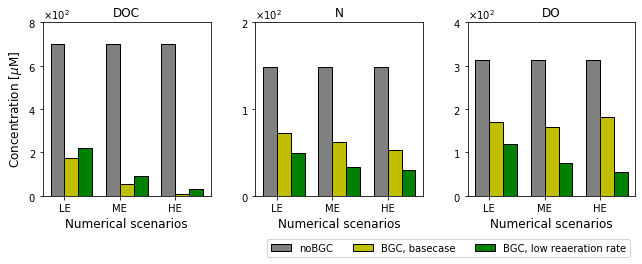

In [17]:
fig, axs = plt.subplots(ncols=3,nrows=1,figsize=(9,3))
plt.tight_layout()
#fig.tight_layout(h_pad=1)
sim_lbl = ['noBGC', 'BGC, basecase', 'BGC, low reaeration rate']
sim_leg = ['LE', 'ME', 'HE']
colors = ['r','k','b','g','gray']
axs[0].bar(np.arange(0,3,1)-0.125 , S1_NBGC['DOC'],width= 0.25, color='grey', ec='k',alpha=1.0,label=sim_lbl[0])
axs[0].bar(np.arange(0,3,1)+0.125 , S1_BGC['DOC'],width= 0.25, color='y', ec='k', alpha=1.0,label=sim_lbl[1])
axs[0].bar(np.arange(0,3,1)+0.375 , S2_BGC['DOC'],width= 0.25, color='g', ec='k', alpha=1.0,label=sim_lbl[2])

axs[1].bar(np.arange(0,3,1)-0.125 , S1_NBGC['N'],width= 0.25, color='grey', ec='k',alpha=1.0,label=sim_lbl[0])
axs[1].bar(np.arange(0,3,1)+0.125 , S1_BGC['N'],width= 0.25, color='y', ec='k', alpha=1.0,label=sim_lbl[1])
axs[1].bar(np.arange(0,3,1)+0.375 , S2_BGC['N'],width= 0.25, color='g', ec='k', alpha=1.0,label=sim_lbl[2])


axs[2].bar(np.arange(0,3,1)-0.125 , S1_NBGC['O2'],width= 0.25, color='grey', ec='k',alpha=1.0,label=sim_lbl[0])
axs[2].bar(np.arange(0,3,1)+0.125 , S1_BGC['O2'],width= 0.25, color='y', ec='k', alpha=1.0,label=sim_lbl[1])
axs[2].bar(np.arange(0,3,1)+0.375 , S2_BGC['O2'],width= 0.25, color='g', ec='k', alpha=1.0,label=sim_lbl[2])

C = ['DOC','N', 'DO']

for i in range(3):
    axs[i].set_xticks(np.arange(0,3,1))
    axs[i].set_xlabel('Numerical scenarios',fontsize=12,fontweight='normal')
    
    #axs[i].set_ylabel("%s [$\mu$M]"%C[i],fontsize=12,fontweight='normal')
    axs[i].set_title("%s"%C[i],fontsize=12,fontweight='normal')
    axs[i].set_xticklabels(sim_leg)
    axs[i].ticklabel_format(axis="y", style="sci", scilimits=(0,0),useMathText=True)
axs[0].set_ylabel("Concentration [$\mu$M]",fontsize=12,fontweight='normal')
axs[0].set_ylim(0,800)
axs[0].set_yticks(np.arange(0,801,200))

axs[1].set_ylim(0,200)
axs[1].set_yticks(np.arange(0,201,100))
axs[2].set_ylim(0,350)
axs[2].set_yticks(np.arange(0,401,100))
axs[2].legend(loc='upper right', fontsize=10, ncol=3, bbox_to_anchor=(0.9,-0.32, .1, .1))
plt.savefig(outfile + 'nutrients_barplot-C.png',bbox_inches='tight',dpi=200)
plt.show()